In [1]:
from pathlib import Path, PurePath
import matplotlib.pyplot as plt
from typing import *
import numpy as np
import subprocess
from typing import *
root = Path("/data/natsuki/dataset_atmaCup11/checkpoints")

In [2]:
def myplot(
    root: Path,
    title: str,
    names: Dict[str, Dict[str, Any]],
    print_score=False,
    niter=5,
    ):
    plt.figure(facecolor="white", dpi=100)
    plt.rcParams["font.size"] = 12.5
    plt.rcParams["font.family"] = "IPAPGothic"
    plt.grid()
    plt.title(title)
    for name in names:
        each_epoch_RMSE = list()
        for epoch in range(1, niter+1):
            each_fold_RMSE = list()
            for fold in range(3):
                try:
                    RMSE_fold = float((root/f"{name}_3fold{fold}"/f"epoch{epoch}_3fold{fold}_test_RMSE.csv").read_text())
                except:
                    RMSE_fold = np.nan
                each_fold_RMSE.append(RMSE_fold)
            RMSE_epoch = np.mean(each_fold_RMSE)
            if print_score and epoch in {5, 10}:
                print(name, epoch, RMSE_epoch)
            each_epoch_RMSE.append(RMSE_epoch)
        plt.plot(
            range(1, niter+1),
            each_epoch_RMSE,
            label=names[name].get('label', name),
            marker="o"
        )
        plt.xticks(range(1, niter+1))
        plt.xlabel("epochs")
        plt.ylabel("3-fold CV estimates of RMSE")
    
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)

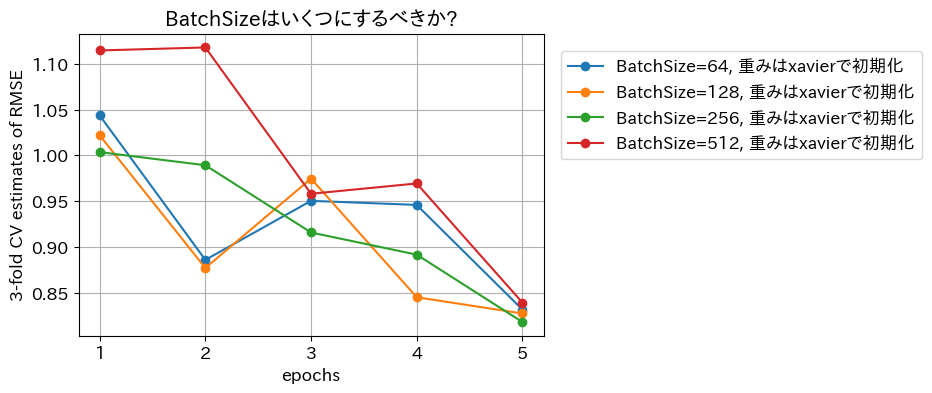

In [3]:
myplot(root, "BatchSizeはいくつにするべきか?", {
    "atma11simple_xavier_b64": {"label":"BatchSize=64, 重みはxavierで初期化"},
    "atma11simple_xavier_b128": {"label":"BatchSize=128, 重みはxavierで初期化"},
    "atma11simple_xavier_b256": {"label":"BatchSize=256, 重みはxavierで初期化"},
    "atma11simple_xavier_b512": {"label":"BatchSize=512, 重みはxavierで初期化"},
})

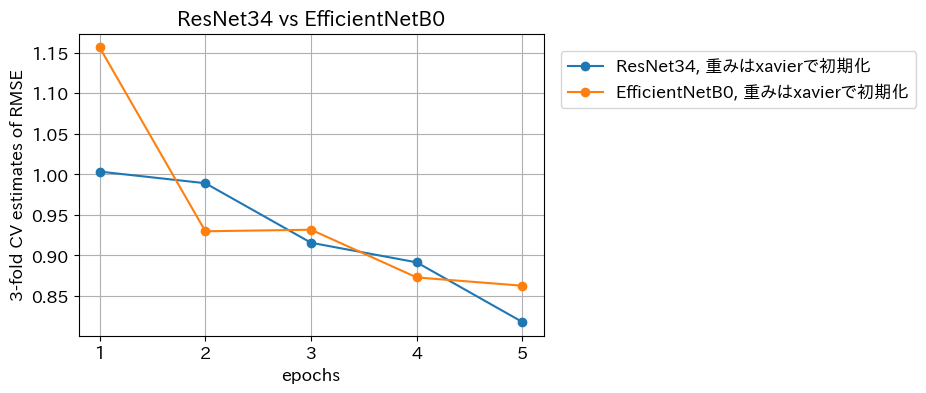

In [4]:
myplot(root, "ResNet34 vs EfficientNetB0", {
    "atma11simple_xavier_b256": {"label":"ResNet34, 重みはxavierで初期化"},
    "atma11simple_xavier_efficientnetb0": {"label":"EfficientNetB0, 重みはxavierで初期化"}
})

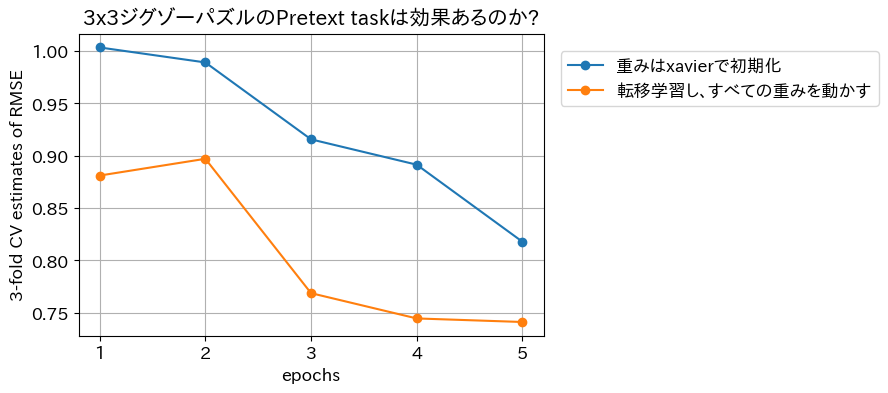

In [5]:
myplot(root, "3x3ジグゾーパズルのPretext taskは効果あるのか?", {
    "atma11simple_xavier_b256": {"label":"重みはxavierで初期化"},
    "atma11simple_j4e5nofreeze": {"label":"転移学習し、すべての重みを動かす"}
})

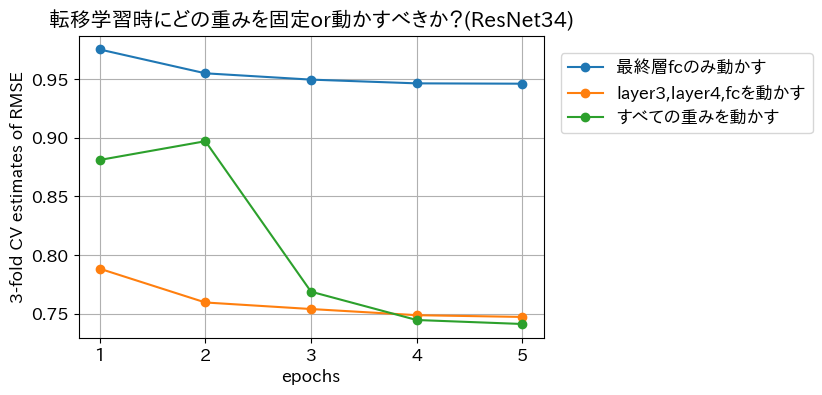

In [6]:
myplot(root, "転移学習時にどの重みを固定or動かすべきか？(ResNet34)", {
    "atma11simple_j4freeze": {"label": "最終層fcのみ動かす"},
    "atma11simple_j4e5unfreeze3": {"label": "layer3,layer4,fcを動かす"},
    "atma11simple_j4e5nofreeze": {"label": "すべての重みを動かす"},
})

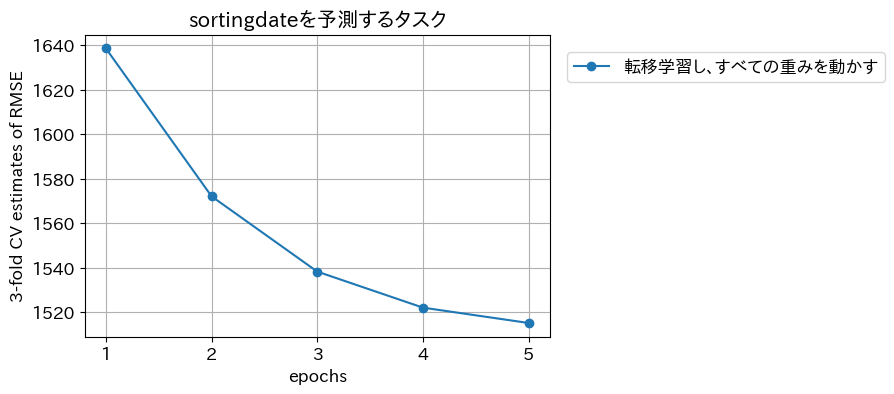

In [7]:
myplot(root, "sortingdateを予測するタスク", {
    "atma11sortingdate_j4e5nofreeze": {"label": "転移学習し、すべての重みを動かす"},
})

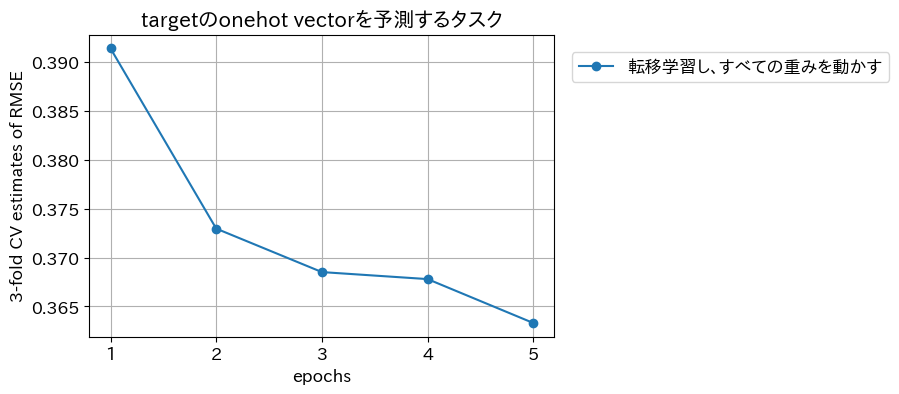

In [8]:
myplot(root, "targetのonehot vectorを予測するタスク", {
    "atma11onehot_j4e5nofreeze": {"label": "転移学習し、すべての重みを動かす"},
}, niter=5)

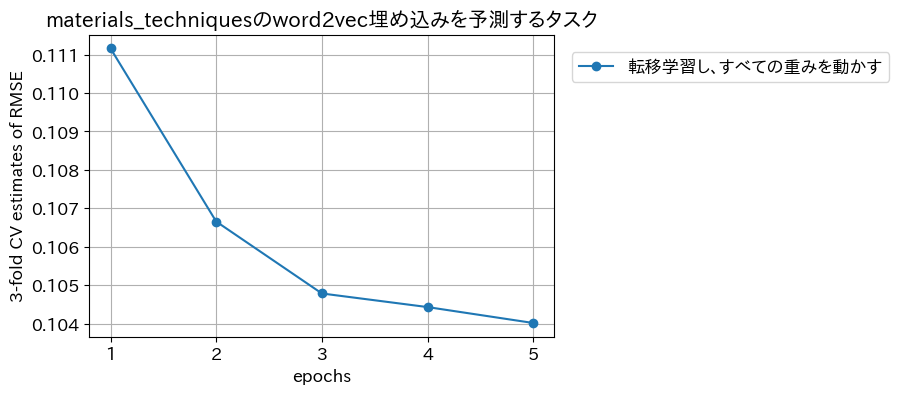

In [9]:
myplot(root, "materials_techniquesのword2vec埋め込みを予測するタスク", {
    "atma11materialstechniques_j4e5nofreeze": {"label": "転移学習し、すべての重みを動かす"},
})